## Data Analysis 3: Prediction and Introduction to Machine Learning - Assignment 1

In [45]:
# Import necessary libraries/packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

# Import the prewritten helper functions
from py_helper_functions import *

### Get Data

In [46]:
# Access the data directly from the book's website
data_earnings = pd.read_csv("https://osf.io/4ay9x/download")

In [47]:
data_earnings.shape

(149316, 23)

In [48]:
#Check columns
data_earnings.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [49]:
#filter the data for selected job codes
selected_job_codes = [500,510,520,530,540,565,600,630,640,650,700,710,725,726,735,740,
                      800, 810, 820, 830, 840, 850, 860, 900, 910, 930, 940, 950]

# Business and Financial Operations Occupations
buss_fin_occ_data = data_earnings[data_earnings['occ2012'].isin(selected_job_codes)]

In [50]:
# There are 7326 observations under "Business and Financial Operations Occupations" title
buss_fin_occ_data.shape

(7326, 23)

In [51]:
buss_fin_occ_data.head()
# With a quick look, we see there are NaN values in the data. We need to handle these in next steps

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.0,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
22,44,954001919079770,January,AL,3677.7816,680.0,40,43,1,NaN,...,0,0,"Native, Born In US",63,Non-depository credit and related activities (...,800,"Private, For Profit",No,No,Employed-At Work
53,125,507001320102921,January,AL,3296.7986,2000.0,50,44,1,NaN,...,1,1,"Native, Born In US",63,Real estate (531),800,"Private, For Profit",No,No,Employed-At Work
56,131,510915094903939,January,AL,3419.5125,1923.0,40,43,1,NaN,...,2,10,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",910,"Private, For Profit",No,No,Employed-At Work
80,187,210033043908195,January,AL,4563.6243,280.0,32,42,1,NaN,...,0,0,"Native, Born In US",63,"Recreational vehicle parks and camps, and room...",800,"Private, For Profit",No,No,Employed-At Work


In [52]:
buss_fin_occ_data.info()

# There are float64(3), int64(11) and object(9) type columns in the data

<class 'pandas.core.frame.DataFrame'>
Index: 7326 entries, 0 to 149296
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7326 non-null   int64  
 1   hhid        7326 non-null   int64  
 2   intmonth    7326 non-null   object 
 3   stfips      7326 non-null   object 
 4   weight      7326 non-null   float64
 5   earnwke     7326 non-null   float64
 6   uhours      7326 non-null   int64  
 7   grade92     7326 non-null   int64  
 8   race        7326 non-null   int64  
 9   ethnic      509 non-null    float64
 10  age         7326 non-null   int64  
 11  sex         7326 non-null   int64  
 12  marital     7326 non-null   int64  
 13  ownchild    7326 non-null   int64  
 14  chldpres    7326 non-null   int64  
 15  prcitshp    7326 non-null   object 
 16  state       7326 non-null   object 
 17  ind02       7326 non-null   object 
 18  occ2012     7326 non-null   int64  
 19  class       7326 non-null   ob

### Exploratory Data Analysis (EDA)

First of all, we would like to know what does each column represent. In other words, we will shortly introduce the data in each column (i.e. variable labels).

* `Unnamed`: An already existing index column in raw data. We will drop it in the next step.
* `hhid`: Household ID
* `intmonth`: Interview calendar month
* `stfips`: State FIPS codes
* `weight`: This is the Final Weight. The sum of the Final Weights in each monthly survey is the US non-institutional population.
* `earnwke`: Weakly earnings
* `uhours`: Usual work hours per week
* `grade92`: Highest grade attended
* `race`: Race
* `ethnic`: Ethnicity
* `age`: Age
* `sex`: Gender
* `marital`: Marital status
* `ownchild`: Number of own children less than 18 in primary family
* `chldpres`: Presence of own children less than 18 in primary family
* `prcitshp`: Citizenship status
* `state`: State
* `ind02`: 3-digit NAICS-based industry code 
* `occ2012`: Occupational code (census 2010 classification)
* `class`: Class of worker
* `unionmme`: Union member
* `unioncov`: Covered by a union contract
* `lfsr94`: Employment status recode


In [53]:
# Check missing variables
to_filter = buss_fin_occ_data.isna().sum()
to_filter[to_filter>0].index
# We have missing values in two columns

Index(['ethnic', 'unioncov'], dtype='object')

In [54]:
to_filter

Unnamed: 0       0
hhid             0
intmonth         0
stfips           0
weight           0
earnwke          0
uhours           0
grade92          0
race             0
ethnic        6817
age              0
sex              0
marital          0
ownchild         0
chldpres         0
prcitshp         0
state            0
ind02            0
occ2012          0
class            0
unionmme         0
unioncov       386
lfsr94           0
dtype: int64

Since we have 7,326 entries in selected job title and 6,817 missing values in `ethnic` column (approximately 93% missing values), it would be wise to drop this column.

##### Columns: Unnamed,  hhid, intmonth, ethnic

In [55]:
# Drop 'ethnic' column due to high rate of missing values
buss_fin_occ_data = buss_fin_occ_data.drop(["ethnic"],axis=1)

# Drop 'unnamed' column (it was an index column in original data)
buss_fin_occ_data = buss_fin_occ_data.drop(["Unnamed: 0"],axis=1)

# Drop 'hhid' column (id column will not help us in the analysis)
buss_fin_occ_data = buss_fin_occ_data.drop(["hhid"],axis=1)

# Drop 'intmonth' column (interview month does not make sense to use since data is not time series but cross-sectional)
buss_fin_occ_data = buss_fin_occ_data.drop(["intmonth"],axis=1)

##### Columns: stfips, state

In [56]:
# Values in 'state' column are irregularly labeled. Insted of this column we may use 'stfips', which has state codes.
buss_fin_occ_data.state.unique()

array(['63', '94', '86', '71', '93', '84', 'CT', '51', '53', '59', '58',
       '95', '82', 'IL', 'IN', 'IA', '47', '61', '72', 'ME', '52', 'MA',
       'MI', 'MN', '64', 'MO', '81', '46', '88', 'NH', 'NJ', '85', 'NY',
       '56', 'ND', 'OH', '73', '92', 'PA', 'RI', '57', 'SD', '62', '74',
       '87', 'VT', '54', '91', 'WI', '83', '55', '6', '9', '8', '7', '1',
       '5', '3', '4', '2', 4, 6, 7, 1, 5, 3, 8, 2, 9], dtype=object)

In [57]:
# Drop 'state' column due to irregularity mentioned above
buss_fin_occ_data = buss_fin_occ_data.drop(["state"],axis=1)

##### Columns: weight

In [58]:
# Drop 'weight' column (it is thuoughy to be unrelated for estimating hourly wages)
buss_fin_occ_data = buss_fin_occ_data.drop(["weight"],axis=1)

##### Columns: earnwke, uhours

In [59]:
# Now create 'earnings per hour' variable
buss_fin_occ_data["earnings_per_hour"] = buss_fin_occ_data["earnwke"] / buss_fin_occ_data["uhours"]

In [60]:
# Now check summary statistics of the 'earnings per hour' variable
buss_fin_occ_data["earnings_per_hour"].describe()

count    7326.000000
mean       29.535976
std        17.345381
min         0.000500
25%        18.269000
50%        25.640889
75%        37.019000
max       500.000000
Name: earnings_per_hour, dtype: float64

Although mean and median values are around 25-30 USD, there seem to be extreme values on both sides (the min and max values are extreme). We will keep them since we don't know whether they are wrong measurement/observations.

In [61]:
buss_fin_occ_data.head()

,stfips,earnwke,uhours,grade92,race,age,sex,marital,ownchild,chldpres,prcitshp,ind02,occ2012,class,unionmme,unioncov,lfsr94,earnings_per_hour
0,AL,1692.0,40,43,1,29,2,7,0,0,"Native, Born In US",Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work,42.300
22,AL,680.0,40,43,1,27,1,7,0,0,"Native, Born In US",Non-depository credit and related activities (...,800,"Private, For Profit",No,No,Employed-At Work,17.000
53,AL,2000.0,50,44,1,48,1,1,1,1,"Native, Born In US",Real estate (531),800,"Private, For Profit",No,No,Employed-At Work,40.000
56,AL,1923.0,40,43,1,47,1,5,2,10,"Native, Born In US","Banking and related activities (521, 52211,52219)",910,"Private, For Profit",No,No,Employed-At Work,48.075
80,AL,280.0,32,42,1,24,1,7,0,0,"Native, Born In US","Recreational vehicle parks and camps, and room...",800,"Private, For Profit",No,No,Employed-At Work,8.750


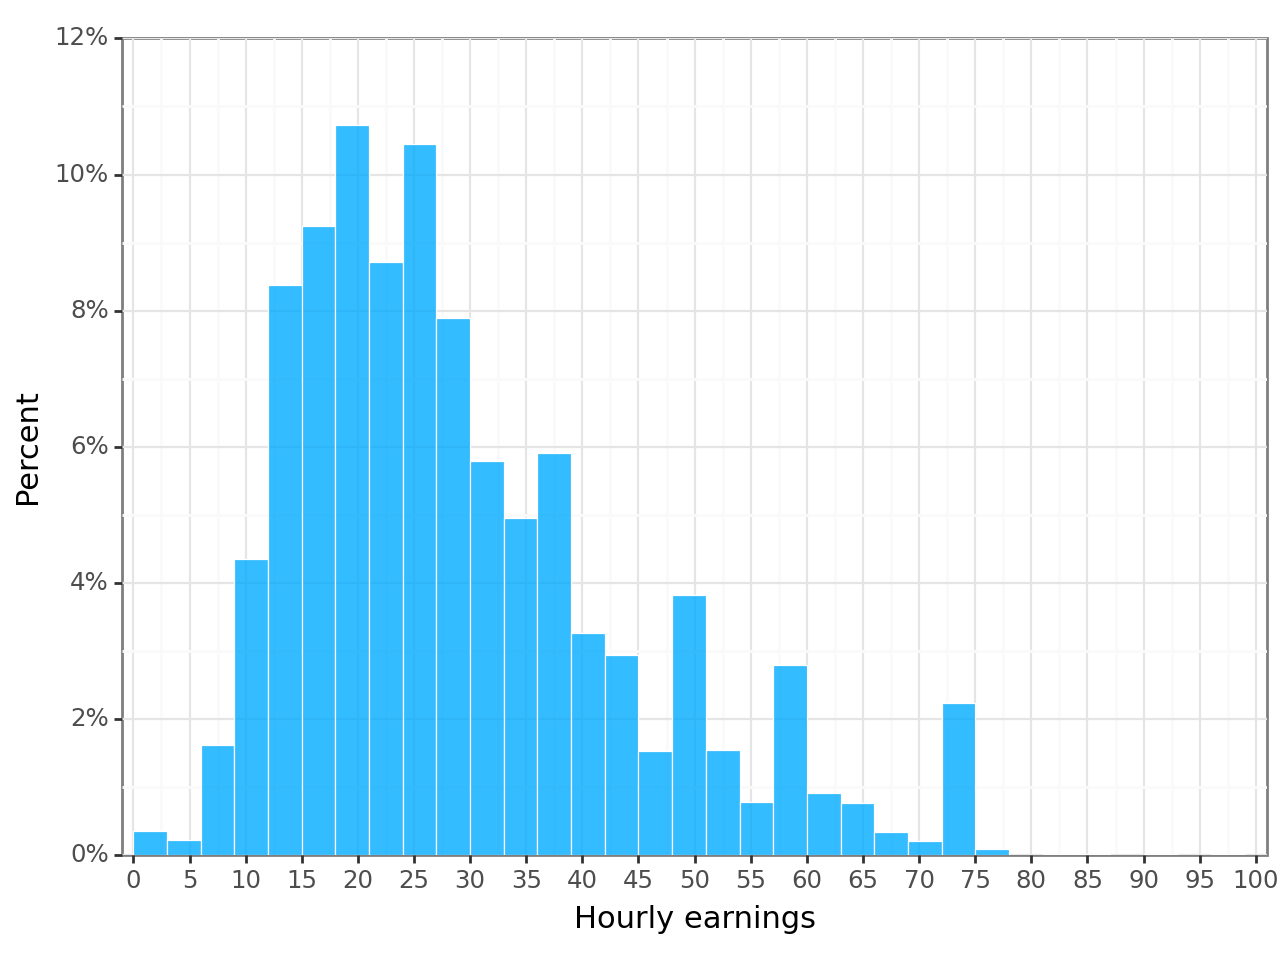

<Figure Size: (640 x 480)>

In [62]:
(
    ggplot(buss_fin_occ_data, aes(x="earnings_per_hour", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill= "#00abff",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.02),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

##### Columns: grade92

In [19]:
# check frequencies by 'grade92'
freq = buss_fin_occ_data.groupby("grade92").agg(frequency=("grade92", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
grade92,,,
31,1,0.014,0.014
32,4,0.055,0.069
33,1,0.014,0.083
34,3,0.041,0.124
35,3,0.041,0.165
36,9,0.123,0.288
37,15,0.205,0.493
38,19,0.259,0.752
39,751,10.251,11.003


Since the majority of the data has education labels between "39-High school graduate" and "44-Master's degree", we will exclude the remaining rows and keep rows that has values in range 39-44.

In [20]:
# Filter the data based on 'grade92' column
buss_fin_occ_data = buss_fin_occ_data.query("grade92>=39 & grade92<=44")

##### Columns: race

In [21]:
# check frequencies by 'race'
freq = buss_fin_occ_data.groupby("race").agg(frequency=("race", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
race,,,
1,5902,82.800,82.800
2,578,8.109,90.909
3,40,0.561,91.470
4,486,6.818,98.288
5,19,0.267,98.555
6,26,0.365,98.920
7,27,0.379,99.299
8,25,0.351,99.650
9,4,0.056,99.706


Since the majority of variable `race` is falls under lable 'White', we will not use this variable in our analysis.

##### Columns: sex

In [22]:
# check frequencies by 'sex'
freq = buss_fin_occ_data.groupby("sex").agg(frequency=("sex", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
sex,,,
1,2894,40.6,40.6
2,4234,59.4,100.0


`1` represents `male` and `2` represents `female`. It is interesting to that see number of female workers is higher than male workers.

##### Columns: age

In [23]:
buss_fin_occ_data.age.describe()

count    7128.000000
mean       41.734708
std        11.760014
min        18.000000
25%        32.000000
50%        42.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Summary of age column shows that the ages of the employees in the dataset are between 16 and 64. There is no need to take any action for this variable for now.

##### Columns: marital

In [24]:
# check frequencies by 'marital status'
freq = buss_fin_occ_data.groupby("marital").agg(frequency=("marital", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,4208,59.035,59.035
2,25,0.351,59.386
3,60,0.842,60.228
4,78,1.094,61.322
5,744,10.438,71.760
6,103,1.445,73.205
7,1910,26.796,100.001


* 1: Married civilian spouse present
* 2: Married AF spouse present 
* 3: Married spouse absent or separated 
* 4: Widowed or divorced(Through 1988)
* 4: Widowed (After 88)
* 5: Divorced (After 88)
* 6: Separated (After 88)
* 7: Never Married

In all years, < 4 is married, otherwise single. Therefore we can re-label these category to 2 categories, namely 'Maried' and 'Single'.

In [25]:
# Decrease marital status values to 2 values. 1 for married and 2 for single
buss_fin_occ_data['marital'] = buss_fin_occ_data['marital'].apply(lambda x: 1 if x < 4 else 2)

C:\Users\USER\AppData\Local\Temp\ipykernel_7524\2369872441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
# check again frequencies by 'marital status'
freq = buss_fin_occ_data.groupby("marital").agg(frequency=("marital", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,4293,60.227,60.227
2,2835,39.773,100.000


I believe that too many categories in this column are not necessary for our analysis. Therefore, we will use in our analysisi whether being married or single has any effect on hourly wages.

##### Columns: prcitshp

In [27]:
# check frequencies by 'citizenship status'
freq = buss_fin_occ_data.groupby("prcitshp").agg(frequency=("prcitshp", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
prcitshp,,,
"Foreign Born, Not a US Citizen",227,3.185,3.185
"Foreign Born, US Cit By Naturalization",499,7.001,10.186
"Native, Born Abroad Of US Parent(s)",90,1.263,11.449
"Native, Born In US",6287,88.201,99.650
"Native, Born in PR or US Outlying Area",25,0.351,100.001


Since the majority of `prcitshp` variable is labeled as 'natives born in US', we will not use this variable in our analysis.

In [28]:
# Drop 'prcitshp' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["prcitshp"],axis=1)

##### Columns: ownchild, chldpres

In [29]:
# check frequencies by 'ownchild'
freq = buss_fin_occ_data.groupby("ownchild").agg(frequency=("ownchild", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ownchild,,,
0,4460,62.570,62.570
1,1163,16.316,78.886
2,1104,15.488,94.374
3,323,4.531,98.905
4,62,0.870,99.775
5,14,0.196,99.971
6,2,0.028,99.999


In [30]:
# check frequencies by 'chldpres'
freq = buss_fin_occ_data.groupby("chldpres").agg(frequency=("chldpres", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
chldpres,,,
0,4460,62.570,62.570
1,336,4.714,67.284
2,178,2.497,69.781
3,730,10.241,80.022
4,508,7.127,87.149
5,150,2.104,89.253
6,92,1.291,90.544
7,9,0.126,90.670
8,257,3.605,94.275


`ownchild` (Number of own children less than 18 in primary family) and `chldpres` (Presence of own children less than 18 in primary family) variables are related to each other and using both can cause collinearity. For these reasons, we may not use the more detailed `chldpres` variable.

In [31]:
# Drop 'chldpres' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["chldpres"],axis=1)

##### Columns: ind02

In [32]:
# check frequencies by 'ind02'
freq = buss_fin_occ_data.groupby("ind02").agg(frequency=("ind02", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ind02,,,
"** Alcoholic beverages, merchant wholesalers (*4248)",4,0.056,0.056
"** Apparel, fabrics, and notions, merchant wholesalers (*4243)",2,0.028,0.084
** Construction (23),164,2.301,2.385
"** Drugs, sundries, and chemical and allied products, merchant (wholesalerss*4242, 4246)",15,0.210,2.595
"** Farm product raw materials, merchant wholesalers (*4245)",10,0.140,2.735
...,...,...,...
Warehousing and storage (493),3,0.042,99.402
Waste management and remediation services (562),12,0.168,99.570
Water transportation (483),1,0.014,99.584


There are two many labels in this industry column and will be hard to interpret the results. Therefore, we drop this column.

In [33]:
# Drop 'ind02' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["ind02"],axis=1)

##### Columns: occ2012

Since we have filtered the occupations using `occ2012` and created "Business and Financial Operations Occupations" title and considered this as single broader occupation, putting this variable into regression will not make sense. Therefore, we drop this column, too.

In [34]:
# Drop 'occ2012' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["occ2012"],axis=1)

In [35]:
# check frequencies by 'class'
freq = buss_fin_occ_data.groupby("class").agg(frequency=("class", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
class,,,
Government - Federal,428,6.004,6.004
Government - Local,238,3.339,9.343
Government - State,401,5.626,14.969
"Private, For Profit",5484,76.936,91.905
"Private, Nonprofit",577,8.095,100.000


Although the majority of `class` of workers is labeled as 'Private, For Profit', we will keep it as it is. There might be differences across in hourly wages across classes.

##### Columns: unionmme, unioncov

In [36]:
# check frequencies by 'unionmme'
freq = buss_fin_occ_data.groupby("unionmme").agg(frequency=("unionmme", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unionmme,,,
No,6755,94.767,94.767
Yes,373,5.233,100.000


In [37]:
# Missing values in 'unioncov' column are labeled as 'Missing'
buss_fin_occ_data["unioncov"] = buss_fin_occ_data["unioncov"].fillna("Missing")

In [38]:
# check frequencies by 'unioncov'
freq = buss_fin_occ_data.groupby("unioncov").agg(frequency=("unioncov", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq


,frequency,percent,cumulative_percent
unioncov,,,
Missing,373,5.233,5.233
No,6688,93.827,99.060
Yes,67,0.940,100.000


Union membership (`unionmme`) and coverage by a union contract (`unioncov`) are very rare in the data. And since these two columns are related, keeping only on of them will be a choice. Since there are more observations of 'Yes' in `unionmme` column and there are no missing values in that column, we will keep this and drop `unioncov` column.

In [39]:
# Drop 'unioncov' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["unioncov"],axis=1)

##### Columns: lfsr94 

In [40]:
# check frequencies by 'lfsr94'
freq = buss_fin_occ_data.groupby("lfsr94").agg(frequency=("lfsr94", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
lfsr94,,,
Employed-Absent,165,2.315,2.315
Employed-At Work,6963,97.685,100.000


Althoug there are few observations labeled as "Employed-Absent", we will keep this column in the analysis. I interpret this workers as remote workers.

### Feature Engineering

In [41]:
buss_fin_occ_data.weight.values

AttributeError: 'DataFrame' object has no attribute 'weight'

In [ ]:
buss_fin_occ_data.stfips.unique()

In [ ]:
buss_fin_occ_data.intmonth.values

In [ ]:
# DATA IMPORT - FROM GITHUB
data = pd.read_csv('https://raw.githubusercontent.com/peterduronelly/DA3-Python-Codes/main/data/used-cars_2cities_prep.csv')

In [ ]:
freq = data.groupby("fuel").agg(frequency=("type", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

In [ ]:
data.type.head()

In [ ]:
number_of_females = len(buss_fin_occ_data[buss_fin_occ_data["sex"] == 2])
number_of_males = len(buss_fin_occ_data[buss_fin_occ_data["sex"] == 1])

In [ ]:
# There are 4079 females and 2836 males (total 6915) working in Business and Financial Operations Occupations 
print(number_of_females)
print(number_of_males)

Create variables for the intended study/research

- female
- hourly wages
- log of hourly wages (dependent variable)
- higher education categories

In [ ]:
buss_fin_occ_data["female"] = (buss_fin_occ_data["sex"] == 2)
buss_fin_occ_data["w"] = buss_fin_occ_data["earnwke"] / buss_fin_occ_data["uhours"]
buss_fin_occ_data["lnw"] = np.log(buss_fin_occ_data["w"])

In [ ]:
buss_fin_occ_data['ed_BA'] = (~buss_fin_occ_data['grade92'].isin([44, 45, 46])).astype(int) #bachelor or less 
buss_fin_occ_data["ed_MA"] = (buss_fin_occ_data["grade92"] == 44).astype(int) #master
buss_fin_occ_data["ed_Profess"] = (buss_fin_occ_data["grade92"] == 45).astype(int) #professional
buss_fin_occ_data["ed_Phd"] = (buss_fin_occ_data["grade92"] == 46).astype(int) #PhD

### Visualize Distribution of Wages 

In [ ]:
(
    ggplot(buss_fin_occ_data, aes(x="lnw", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill="#00abff",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="log hourly wages", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

Logaritmic transformation results in a better distribution

### Visualize Wages by Gender and Education Level

In [ ]:
# Select relevant data for the chart
chart_data = buss_fin_occ_data[['female', 'ed_BA', 'ed_MA', 'ed_Profess', 'ed_Phd', 'w']]

# Create a new variable representing "College Degree or Less"
chart_data['education'] = pd.Categorical(np.argmax(chart_data[['ed_BA', 'ed_MA', 'ed_Profess', 'ed_Phd']].values, axis=1),
                                          categories=[0, 1, 2, 3], ordered=True)

# Map the values of the new variable to labels
education_labels = {0: 'College Degree or Less', 1: 'MA', 2: 'Professional', 3: 'Ph.D.'}
chart_data['education_label'] = chart_data['education'].map(education_labels)

# Melt the data for easier plotting
chart_data_melted = pd.melt(chart_data, id_vars=['female', 'education', 'education_label'], value_vars='w')

# Create the grouped bar chart
(
    ggplot(chart_data_melted, aes(x='education_label', y='value', fill='factor(female)')) +
    geom_bar(stat='identity', position='dodge', width=0.7, size=0.25) +  # Set color to 'white' and size to 0.25
    scale_fill_manual(values=["#00abff", "#ff7f00"], labels=["Male", "Female"]) +
    labs(x='Education Level', y='Average Hourly Wages') #, title='Wage Changes by Gender and Education') 
    + theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1),  # Rotate x-axis labels for better readability
          legend_title=element_blank(),  # Remove legend title
          panel_grid_major=element_blank(),  # Remove major gridlines
          panel_grid_minor=element_blank())  # Remove minor gridlines
)

From the grouped bar chart, it seems higher education reduces the gender earnings gap.

### Descriptive Table for Selected Variables

In [ ]:
buss_fin_occ_data = buss_fin_occ_data.query("grade92>=44")
print(buss_fin_occ_data.shape) # removed observations with less than MA degree
buss_fin_occ_data.loc[:, ["earnwke", "uhours", "w", "lnw"]].describe()

In [ ]:
buss_fin_occ_data["female"] = buss_fin_occ_data["female"].astype(int)  #from boolean to 0,1
buss_fin_occ_data["female"].value_counts()

### Earnings and female gender
#### Linear regressions
**Log-level**:

$(\ln{w})^E = \alpha + \beta \times female$

In [ ]:
reg1 = smf.ols(formula="lnw~female", data=buss_fin_occ_data).fit()
reg1.summary()

In [ ]:
reg2 = smf.ols(formula="w~female", data=buss_fin_occ_data).fit(cov_type="HC1") 
reg3 = smf.ols(formula="lnw~female", data=buss_fin_occ_data).fit(cov_type="HC1") 
#heteroskedastic-consistent standard errors
reg3.summary()

Robust SE slope: 0.032, CI  [−0.29, -0.16] (wide range probably due to small number of observations)

-> in 2014 in the USA we can be 95% confident that the ifference between hourly earnings of female market analysts versus male was -29% to -16% and on everage -22%

-> the CI does not includes zero -> we can rule out with 95% confidence that their average earnings (female and male) are the same

->  |𝑡|= 7 > 1.96
    reject  𝐻0
 
-> it can be seen also by p-value < 0.05
 
-> the coefficient canconsidered statistically significant at 5% (even at 1%)

### Wage and gender gap baseline regression

In [ ]:
stargazer = Stargazer([reg1, reg2, reg3])
stargazer.covariate_order(["female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

Slope: female in Business and Financial Operations Occupations earn 22\% ($\beta\times 100\%$) less, on average than male in the same occupations (in this data).
Gender coefficient is statistically significant at 1% (p<0.01). <

Using nominal hourly wages ('w') in 2nd regression gives also a negative coefficient but in this case it is more difficult to interpret.

### Gender differences in earnings – log earnings, gender and education

-> the category not represented is the **reference category**

-> coefficients on each $k-1$ dummy show average differences in $y$ compared to the reference category

-> also include interactions term to see the chnage of gender gap as education level changes

In [ ]:
reg4 = smf.ols(formula="lnw~female + ed_Profess + ed_MA", data=buss_fin_occ_data).fit(cov_type="HC1")
reg5 = smf.ols(formula="lnw~female + ed_Profess + ed_Phd", data=buss_fin_occ_data).fit(cov_type="HC1")
reg6 = smf.ols(formula="lnw ~ female + ed_Profess + ed_Phd + female:ed_Profess + female:ed_Phd", data=buss_fin_occ_data).fit(cov_type="HC1")

In [ ]:
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])
stargazer.covariate_order(["female", "ed_MA", "ed_Profess", "ed_Phd", "female:ed_Profess", "female:ed_Phd", "Intercept"])

stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

Controlling for level of education in the regression decreases the level of gender gap (coefficient of 'female' is smaller very little) in 4th and 5th regressions. However, 4th and 5th regressions does not give us how gap changes as education level changes. In 6th regression we introduced interaction terms of 'female' with different levels of gradute degrees. In this regression we see that interaction term betwwen 'female' and 'ed_Profess' is very small and statistically not significant. Interaction term betwwen 'female' and 'ed_Phd' is +29% and statistically significant. That means females with a PhD degree earn 29% percent higher than their male counterparts. We can roughly say that the gender gap decreases as education level increases.